In [343]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

In [344]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\vgsales.csv")

In [345]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [369]:
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
le = LabelEncoder()
dtr = DecisionTreeRegressor()
model = LinearRegression()
model2 = LinearRegression()
scaler = StandardScaler()
rd = Ridge()
ls = Lasso()
poly = PolynomialFeatures()

In [347]:
df2.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [348]:
df2 = df2.drop(columns = ['Name','Rank','Global_Sales'])
df3 = df3.drop(columns = ['Name','Rank','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])

In [349]:
objv = df2.select_dtypes(include = 'object')
for i in objv.columns:
    df2[i] = le.fit_transform(df2[i])
    df3[i] = le.fit_transform(df3[i])

In [350]:
df2.isnull().sum()

Platform         0
Year           271
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [351]:
df2['Year'] = df2['Year'].fillna(df2['Year'].median())
df3['Year'] = df3['Year'].fillna(df3['Year'].median())
df3['Publisher'] = df3['Publisher'].fillna(df3['Publisher'].median())

In [352]:
df2.isnull().sum(),df3.isnull().sum()

(Platform       0
 Year           0
 Genre          0
 Publisher      0
 NA_Sales       0
 EU_Sales       0
 JP_Sales       0
 Other_Sales    0
 dtype: int64,
 Platform        0
 Year            0
 Genre           0
 Publisher       0
 Global_Sales    0
 dtype: int64)

In [353]:
df2.describe()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,15.797988,2006.416134,4.928124,294.602542,0.264667,0.146652,0.077782,0.048063
std,8.392298,5.781686,3.762015,178.087732,0.816683,0.505351,0.309291,0.188588
min,0.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2003.000000,1.000000,137.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,2007.000000,5.000000,323.000000,0.080000,0.020000,0.000000,0.010000
75%,21.000000,2010.000000,8.000000,461.000000,0.240000,0.110000,0.040000,0.040000
max,30.000000,2020.000000,11.000000,578.000000,41.490000,29.020000,10.220000,10.570000


<Axes: ylabel='Year'>

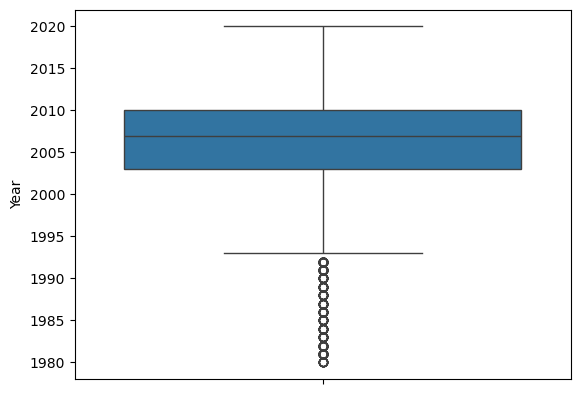

In [354]:
sns.boxplot(df2['Year'])

In [355]:
df2

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,26,2006.0,10,359,41.49,29.02,3.77,8.46
1,11,1985.0,4,359,29.08,3.58,6.81,0.77
2,26,2008.0,6,359,15.85,12.88,3.79,3.31
3,26,2009.0,10,359,15.75,11.01,3.28,2.96
4,5,1996.0,7,359,11.27,8.89,10.22,1.00
...,...,...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.00,0.00,0.00
16594,7,2003.0,8,241,0.01,0.00,0.00,0.00
16595,16,2008.0,6,21,0.00,0.00,0.00,0.00
16596,4,2010.0,5,8,0.00,0.01,0.00,0.00


In [356]:
def Outliers(df,columns):
    for i in columns:
        df[i] = pd.to_numeric(df[i], errors='coerce')
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upperlimit = q3 + (1.5 * iqr)
        lowerlimit = q1 - (1.5 * iqr)
        df.loc[(df[i] > upperlimit),i] = upperlimit   
        df.loc[(df[i] < lowerlimit),i] = lowerlimit 
    return df
cols = ['Year','Other_Sales','JP_Sales','EU_Sales','NA_Sales']
cols2 = ['Year','Global_Sales']
df2 = Outliers(df2,cols)
df3 = Outliers(df3,cols2)

In [357]:
df2

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,26,2006.0,10,359,0.60,0.275,0.1,0.1
1,11,1992.5,4,359,0.60,0.275,0.1,0.1
2,26,2008.0,6,359,0.60,0.275,0.1,0.1
3,26,2009.0,10,359,0.60,0.275,0.1,0.1
4,5,1996.0,7,359,0.60,0.275,0.1,0.1
...,...,...,...,...,...,...,...,...
16593,6,2002.0,4,269,0.01,0.000,0.0,0.0
16594,7,2003.0,8,241,0.01,0.000,0.0,0.0
16595,16,2008.0,6,21,0.00,0.000,0.0,0.0
16596,4,2010.0,5,8,0.00,0.010,0.0,0.0


<Axes: >

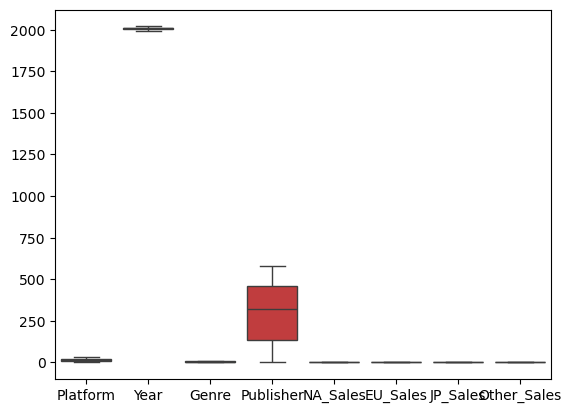

In [358]:
sns.boxplot(df2)

<Axes: ylabel='Global_Sales'>

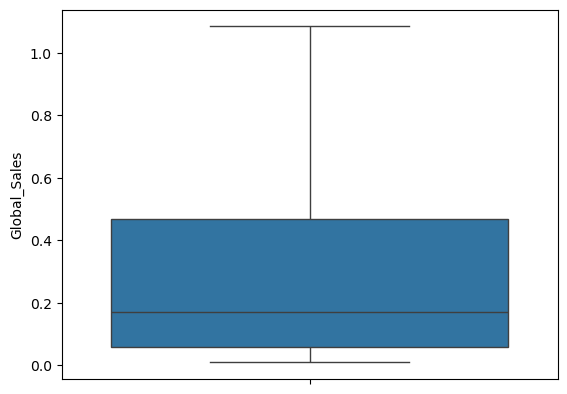

In [359]:
sns.boxplot(df3['Global_Sales'])

In [360]:
x = df2.drop(columns = 'JP_Sales')
y = df2['JP_Sales']

In [361]:
X = df3.drop(columns = 'Global_Sales')
Y = df3['Global_Sales']

In [362]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70,test_size = 30)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,random_state = 70,test_size = 30)

In [380]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)
model.fit(xtrainscaled,ytrain)
linears2 = model.score(xtestscaled,ytest)

In [379]:
scaler.fit(Xtrain)
Xtrainscaled = scaler.transform(Xtrain)
Xtestscaled = scaler.transform(Xtest)
model.fit(Xtrainscaled,Ytrain)
linears1 = model.score(Xtestscaled,Ytest)

In [377]:
poly.fit(Xtrain)
Xtrainpoly = poly.transform(Xtrain)
Xtestpoly = poly.transform(Xtest)
model2.fit(Xtrainpoly,Ytrain)
polys1 = model2.score(Xtestpoly,Ytest)

In [378]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polys2 = model2.score(xtestpoly,ytest)

In [384]:
rd.fit(Xtrainscaled,Ytrain)
ridge1 = rd.score(Xtestscaled,Ytest)
ridge1

0.02751097435086891

In [386]:
rd.fit(xtrainscaled,ytrain)
ridge2 = rd.score(xtestscaled,ytest)

In [388]:
dtr.fit(Xtrainscaled,Ytrain)
dtrs1 = dtr.score(Xtestscaled,Ytest)

In [391]:
dtr.fit(xtrainscaled,ytrain)
dtrs2 = dtr.score(xtestscaled,ytest)

In [395]:
print("Regression Using Global_Sales")
print("Linear Regression",linears1)
print("Ridge Regression:",ridge1)
print("Polynomial Regression:",polys1)
print("Decision Tree Regressor:",dtrs1)

Regression Using Global_Sales
Linear Regression 0.027510689388035137
Ridge Regression: 0.02751097435086891
Polynomial Regression: 0.09297746890095027
Decision Tree Regressor: -0.18305161864040542


In [396]:
print("Regression Without Using Global_Sales")
print("Linear Regression",linears2)
print("Ridge Regression:",ridge2)
print("Polynomial Regression:",polys2)
print("Decision Tree Regressor:",dtrs2)

Regression Without Using Global_Sales
Linear Regression -0.019984853004465952
Ridge Regression: -0.0199754816353217
Polynomial Regression: 0.06851754504402852
Decision Tree Regressor: 0.45733992328120376
